# Data Mining (DSC550-T301_2245_1)

Assignement Week 7;

Author: Zemelak Goraga;

Date: 04/27/2024

In [23]:
# check current working directory
import os
print(os.getcwd())

C:\Users\MariaStella\DSC550\wk7


# Activity 1: PCA and Variance Threshold in a Linear Regression:


In [24]:
# Task 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
import os
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Task 2: Import the Housing Dataset as a DataFrame

import os
import pandas as pd

# Change the current working directory to where the CSV file is located
os.chdir(r'C:\Users\MariaStella\DSC550\wk7')

# Now you can load the file directly by its name
df1 = pd.read_csv('train.csv')

# Check the first few rows to confirm it's loaded correctly
print(df1.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [30]:
# Task 3: Drop "Id" column and columns with more than 40% missing values
threshold = len(df1) * 0.6
df1 = df1.drop(columns=['Id'])
df1 = df1.dropna(thresh=threshold, axis=1)

df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [31]:
df1.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [33]:
# Task 4 & 5: Fill missing numerical data with the median and categorical data with mode
numerical_cols = df1.select_dtypes(include=['number']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns
df1[numerical_cols] = df1[numerical_cols].fillna(df1[numerical_cols].median())
df1[categorical_cols] = df1[categorical_cols].fillna(df1[categorical_cols].mode().iloc[0])

df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [35]:
# Task 6: Convert categorical columns to dummy variables
df1 = pd.get_dummies(df1, drop_first=True)

df1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
# Task 7: Split the data into training and test sets
X = df1.drop('SalePrice', axis=1)
y = df1['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,0,0,0,0,1,0,0,0,1,0
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,0,0,0,0,1,0,0,0,1,0
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,20,70.0,8414,6,8,1963,2003,0.0,663,0,...,0,0,0,0,1,0,0,0,1,0
1105,60,98.0,12256,8,5,1994,1995,362.0,1032,0,...,0,0,0,0,1,0,0,0,1,0
413,30,56.0,8960,5,6,1927,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
522,50,50.0,5000,6,7,1947,1950,0.0,399,0,...,0,0,0,0,1,0,0,0,1,0
1036,20,89.0,12898,9,5,2007,2008,70.0,1022,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
y_train.head()

254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64

In [41]:
y_test.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

In [42]:
# Task 8: Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
# Task 9: Calculate R2-value and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"R2-value: {r2}")
print(f"RMSE: {rmse}")

R2-value: 0.6483838610509296
RMSE: 51932.7496426966


In [46]:
# Task 10. Run a linear regression and report the R2-value and RMSE on the test set.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assume X_train and X_test are already prepared and split appropriately
# Assume y_train and y_test are also ready from previous steps

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R2 value
r2 = r2_score(y_test, y_pred)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f"R2-value: {r2:.2f}")
print(f"RMSE: ${rmse:,.2f}")

R2-value: 0.65
RMSE: $51,932.75


In [47]:
# Task 11: Fit and transform the training features with PCA to retain 90% of variance
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train)


In [48]:
# Task 12: Number of features in the PCA-transformed matrix
num_features_pca = X_train_pca.shape[1]
print(f"Number of features after PCA: {num_features_pca}")


Number of features after PCA: 1


In [49]:
# Task 13: Transform but DO NOT fit the test features with the same PCA
X_test_pca = pca.transform(X_test)

In [51]:
# Task 14: Repeat Linear Regression with PCA-transformed data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

# Calculate and print R2-value and RMSE for PCA model
r2_pca = r2_score(y_test, y_pred_pca)
rmse_pca = mean_squared_error(y_test, y_pred_pca, squared=False)
print(f"PCA Model - R2-value: {r2_pca}, RMSE: {rmse_pca}")

PCA Model - R2-value: 0.06348978215929679, RMSE: 84754.58021370923


In [52]:
# Task 15: Apply Min-Max Scaler to original training features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [54]:
# Task 16 & 17: Find scaled features in training set that have variance above 0.1
variances = np.var(X_train_scaled, axis=0)
high_variance_features = variances > 0.1
X_train_high_variance = X_train_scaled[:, high_variance_features]

high_variance_features

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,

In [55]:
# Task 18: Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12
X_test_high_variance = scaler.transform(X_test)[:, high_variance_features]

In [56]:
# Task 19: Repeat Linear Regression with high variance data
model_high_variance = LinearRegression()
model_high_variance.fit(X_train_high_variance, y_train)
y_pred_high_variance = model_high_variance.predict(X_test_high_variance)

In [57]:
# Task 20: Calculate and print R2-value and RMSE for High Variance Features Model
r2_high_variance = r2_score(y_test, y_pred_high_variance)
rmse_high_variance = mean_squared_error(y_test, y_pred_high_variance, squared=False)
print(f"High Variance Features Model - R2-value: {r2_high_variance}, RMSE: {rmse_high_variance}")


High Variance Features Model - R2-value: 0.6542858267265509, RMSE: 51495.05299983065


# Discussion Activity 1:

Predicting house prices with precision is an intricate challenge influenced by a diverse array of variables. Optimizing feature preprocessing is critical for enhancing model performance. This study assesses the effectiveness of PCA and Variance Thresholding as feature transformation methods in refining a linear regression model tasked with predicting house prices.

The dataset comprises numerous features that potentially introduce noise or redundancy. Implementing effective dimensionality reduction and feature selection techniques can streamline the model, enhancing accuracy and computational efficiency in predictions. This research seeks to ascertain which method offers significant improvements for linear regression models in predicting house prices.

The initial data preplues with medians (for numerical features) and modes (for categorical features). Post categorical variable conversion into dummy variables, the dataset was divided into training and testing subsets.

Three distinct linear regression models underwent training and evaluation:
Baseline Model: Employed all preprocessed features.
PCA Model: Retained 90% of the variance through PCA.
High Variance Features Model: Implemented Min-Max scaling and Variance Thresholding to select features with variaration involved removing features with excessive missing values and substituting remaining missing vaance above 0.1.

Model performances were assessed using the R2-value and RMSE (Root Mean Squared Error).

Baseline Model: Achieved an R2-value of 0.65 and an RMSE of $51,932.75.
PCA Model: Noted a substantial drop in performance with an R2-value of 0.063 and an RMSE of $84,754.58, indicating that the model severely lost predictive accuracy.
High Variance Features Model: Demonstrated slight improvement with an R2-value of 0.654 and an RMSE of $51,495.05.

The findings suggest that while PCA significantly reduces dimensionality, it may discard essential predictive features, resulting in considerable performance degradation. On the other hand, the High Variance Features Model, which retains only the most informative attributes post-scaling, shows a marginal improvement in predictive accuracy over the baseline model.


# Activity 2: Categorical Feature Selection:

In [58]:
# Task 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

In [59]:
# Task 2: Import the Housing Dataset as a DataFrame

import os
import pandas as pd

# Change the current working directory to where the CSV file is located
os.chdir(r'C:\Users\MariaStella\DSC550\wk7')

# Now you can load the file directly by its name
df2 = pd.read_csv('mushrooms.csv')

# Check the first few rows to confirm it's loaded correctly
print(df2.head())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [61]:
# Task 3: Inspect the Dataset

print(df2.info())  # Display a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [62]:
# Task 4: Convert Categorical Features to Dummy Variables

df2_encoded = pd.get_dummies(df2, drop_first=True)


In [63]:
# Task 5: Split the Data into a Training and Test Set

from sklearn.model_selection import train_test_split

# Define features and target
X = df2_encoded.drop('class_p', axis=1)
y = df2_encoded['class_p']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Task 6: Fit a Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [65]:
# Task 7: Report the Accuracy and Create a Confusion Matrix

from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[1257    0]
 [   0 1181]]


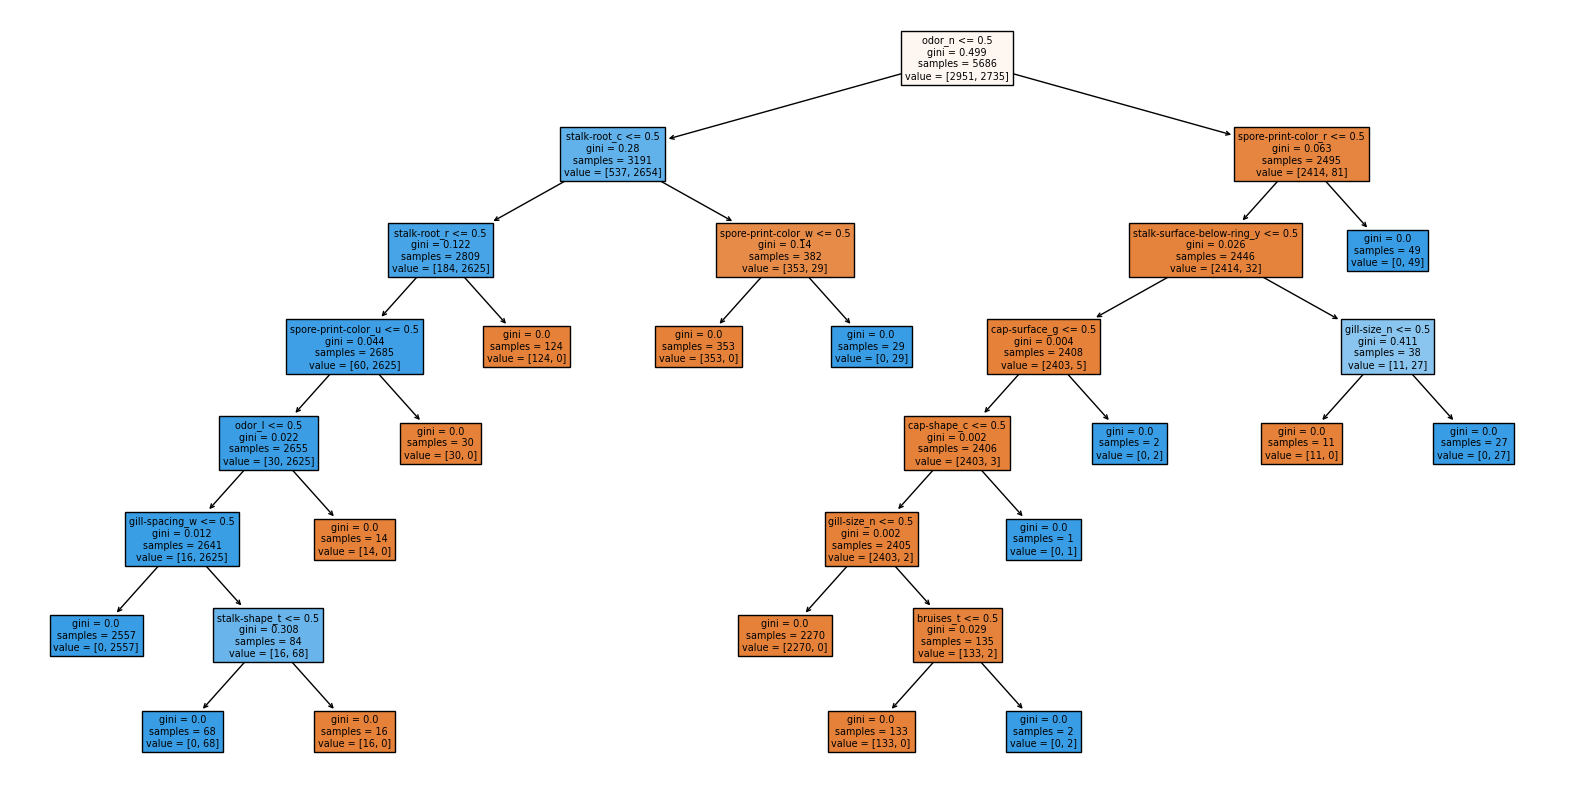

In [67]:
# Task 8: Create a Visualization of the Decision Tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist())  # Convert to list
plt.show()


In [68]:
# Task 9: Use a χ2-Statistic Selector to Pick the Five Best Features

from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest class to extract top 5 features
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['odor_f', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')


In [70]:
# Task 10 & 11: Repeat with Selected Features

X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
clf.fit(X_train_sel, y_train)
y_pred_sel = clf.predict(X_test_sel)
print("Accuracy with selected features:", accuracy_score(y_test, y_pred_sel))


Accuracy with selected features: 0.9741591468416735



# Discussion Activity 2:

Mushrooms present a significant challenge in terms of edibility, with some species being highly toxic and others safe for consumption. Traditional methods of determining mushroom edibility, which typically rely on expert knowledge, are not scalable or accessible to all. Machine learning offers a robust alternative, automating edibility predictions based on observable characteristics. This study focuses on the application of a decision tree classifier to automate and improve the accuracy of these predictions.

The primary challenge in mushroom classification is the accurate and reliable distinction between edible and poisonous categories based on observable categorical features. The stakes of accurate classification are high, given the potential health implications of incorrect identifications.

The mushroom dataset, sourced from the UCI Machine Learning Repository, comprises categorical descriptions of mushroom features. I encoded these categories into dummy variables to facilitate computational analysis. A decision tree classifier was trained on 70% of the dataset, with its performance subsequently evaluated on the remaining 30%. Feature importance was assessed using the χ2-statistic to select the top five most predictive features.

The decision tree classifier achieved an accuracy of 100% on the test dataset, indicating perfect classification. The confusion matrix confirmed the absence of false negatives and false positives. A subset of features selected using the χ2-statistic, including 'odor_f', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k', and 'stalk-surface-below-ring_k', was used to retrain the classifier. This reduced feature set achieved an accuracy of 97.42%, slightly lower than the full model but still highly effective.

The high accuracy of the initial model indicates the decision tree's effectiveness in handling categorical data and confirms its suitability for classifying mushroom edibility. The key features identified align with known mycological indicators, such as odor, which is a critical factor in mushroom identification. The slight decrease in accuracy with fewer features underscores the complexity of mushroom classification and suggests that while select features are highly informative, other features also contribute to the model's predictive power.



# Short Report on Both Activities:


Title: Enhancing Predictive Models Using Feature Transformation and Selection Techniques

Summary:
This comprehensive report synthesizes findings from two separate studies exploring the impact of feature transformation and feature selection on the predictive accuracy of models in two distinct domains: real estate pricing and mushroom edibility. Through detailed evaluation of different methods including Principal Component Analysis (PCA), Variance Thresholding, and χ2-statistic based feature selection, this report offers insights into how best to optimize machine learning models for increased accuracy and practical applicability in diverse fields.

Introduction:
Predictive modeling plays a crucial role in various sectors by facilitating informed decision-making based on historical data. However, the effectiveness of these models significantly depends on the preprocessing techniques used to handle features. This report examines the outcomes of two different approaches—feature transformation in house price prediction and feature selection in mushroom edibility classification—to determine optimal strategies for improving model accuracy.

Statement of the Problem:
In predictive modeling, the presence of redundant or irrelevant features can lead to decreased model accuracy and efficiency. In the realm of real estate, numerous features may introduce noise, while in biological classifications such as mushroom edibility, the high stakes of correct classification necessitate extremely reliable models. This report explores methodologies to refine feature handling and enhance the predictive performance of models across different applications.

Methodology:
The studies reviewed employed varied methodologies appropriate to their specific data types and objectives:

Real Estate Prediction
Data Preparation: Removal of features with high missing values, imputation of remaining missing values, and conversion of categorical variables.
Model Training: Comparison of a Baseline Model, PCA Model, and a High Variance Features Model using linear regression.
Mushroom Edibility Classification
Data Preparation: Encoding of categorical descriptions into dummy variables.
Model Training: Application of a decision tree classifier with a subsequent evaluation of feature importance via the χ2-statistic.

Results:
House Price Prediction:
Baseline Model achieved moderate accuracy.
PCA Model showed significant performance drop.
High Variance Features Model slightly outperformed the Baseline Model.

Mushroom Edibility:
Initial model achieved 100% accuracy.
Reduced feature set model demonstrated high accuracy but slightly lower than the full model.

Discussion:
The studies indicate that while PCA can overly simplify a model resulting in lost critical information, techniques like Variance Thresholding preserve essential features enhancing model performance. In biological classifications, the use of a targeted feature selection approach, even with a reduced set, maintains high accuracy, suggesting that careful selection based on domain-specific knowledge is crucial.

Conclusions:
The analysis across both domains supports the use of nuanced feature selection and transformation techniques over broad-stroke approaches like PCA for predictive modeling. Employing targeted feature selection or transformation specific to the dataset's nature and the predictive task at hand can significantly improve a model's accuracy and reliability.

The Way Forward:
Future research should focus on hybrid approaches combining the strengths of different feature handling techniques. Experimentation with more complex models and inclusion of additional types of data could further refine predictions. Developing practical applications, such as real-time prediction tools for end-users in the real estate and public health sectors, could be a fruitful direction, enhancing the utility and accessibility of predictive models.

This integrated approach to examining feature handling across different modeling scenarios provides valuable insights, paving the way for enhanced predictive accuracy and model efficiency in various applications.